In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics

In [2]:
df = pd.read_csv('CloudFactory_DataSet_Accuracy_Prediction.tsv', sep='\t')
df.head()

,timestamp,task_id,worker_id,keypress_keytypeint,mousemove_distance,mouseclick_button,work_duration,accuracy
0,1470267718900,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,4.0,NaN,NaN,23.884,1.0
1,1470267724803,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,NaN,NaN,23.884,1.0
2,1470267724823,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,NaN,NaN,23.884,1.0
3,1470267725117,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,NaN,NaN,23.884,1.0
4,1470267725276,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,NaN,NaN,23.884,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239464 entries, 0 to 239463
Data columns (total 8 columns):
timestamp              239464 non-null int64
task_id                239464 non-null object
worker_id              239464 non-null object
keypress_keytypeint    186671 non-null float64
mousemove_distance     24430 non-null float64
mouseclick_button      28608 non-null float64
work_duration          239464 non-null float64
accuracy               239464 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.6+ MB


In [4]:
df.fillna(0,axis=1,inplace=True)
df.head()

,timestamp,task_id,worker_id,keypress_keytypeint,mousemove_distance,mouseclick_button,work_duration,accuracy
0,1470267718900,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,4.0,0.0,0.0,23.884,1.0
1,1470267724803,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,0.0,0.0,23.884,1.0
2,1470267724823,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,0.0,0.0,23.884,1.0
3,1470267725117,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,0.0,0.0,23.884,1.0
4,1470267725276,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,0.0,0.0,23.884,1.0


In [5]:
df_accu = df[['task_id','work_duration','accuracy']]
df_accu = df_accu.groupby('task_id').mean()
df_accu.head()

,work_duration,accuracy
task_id,,
57a280bc296d6d75f3d34350,16.770,1.0
57a280bc296d6d75f3d34351,32.118,1.0
57a28146e2013f2463dcd0b8,23.884,1.0
57a28146e2013f2463dcd0ba,12.470,1.0
57a28146e2013f2463dcd0bb,13.629,1.0


In [6]:
df_accu.reset_index(level=0, inplace= True)
pd.DataFrame[(df_accu[df_accu['accuracy']==1)]

SyntaxError: invalid syntax (<ipython-input-6-e221573bfafa>, line 2)

In [7]:
m = pd.DataFrame(df_accu['accuracy'])
m

,accuracy
task_id,
57a280bc296d6d75f3d34350,1.000000
57a280bc296d6d75f3d34351,1.000000
57a28146e2013f2463dcd0b8,1.000000
57a28146e2013f2463dcd0ba,1.000000
57a28146e2013f2463dcd0bb,1.000000
57a28146e2013f2463dcd0bc,1.000000
57a28146e2013f2463dcd0bd,1.000000
57a28147e2013f2463dcd0bf,1.000000
57a28147e2013f2463dcd0c0,1.000000


I am commenting this as it has already being done once. 
df_accu.to_csv('Duration_accuracy.csv')

In [8]:
df_accu['mistake'] = 1 - df_accu['accuracy']

In [9]:
df_accu['work_duration'].corr(df_accu['accuracy'])

0.064000194239626496

In [10]:
df_accu.head()

,work_duration,accuracy,mistake
task_id,,,
57a280bc296d6d75f3d34350,16.770,1.0,0.0
57a280bc296d6d75f3d34351,32.118,1.0,0.0
57a28146e2013f2463dcd0b8,23.884,1.0,0.0
57a28146e2013f2463dcd0ba,12.470,1.0,0.0
57a28146e2013f2463dcd0bb,13.629,1.0,0.0


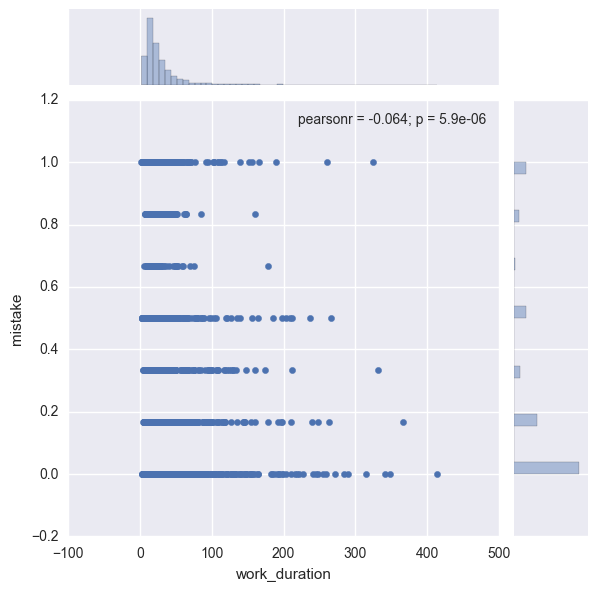

In [11]:
sns.jointplot(x='work_duration',y = 'mistake',data=df_accu)

In [12]:
df_accu['mistake'].cov(df_accu['work_duration'])

-0.65908692588517759

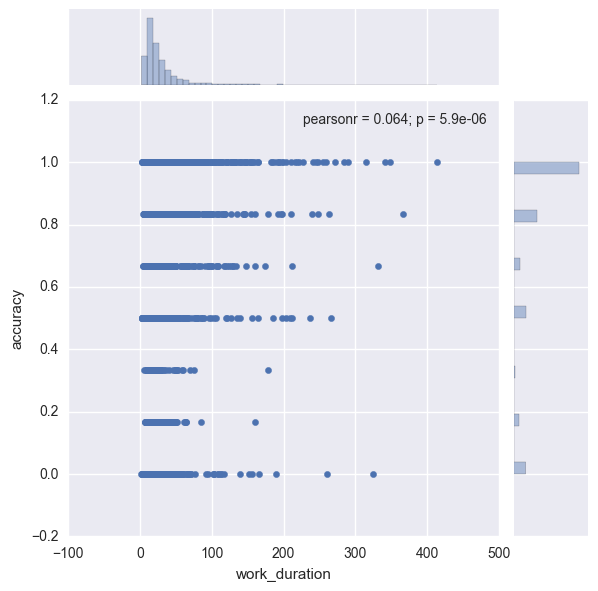

In [13]:
sns.jointplot(x='work_duration', y = 'accuracy',data=df_accu)

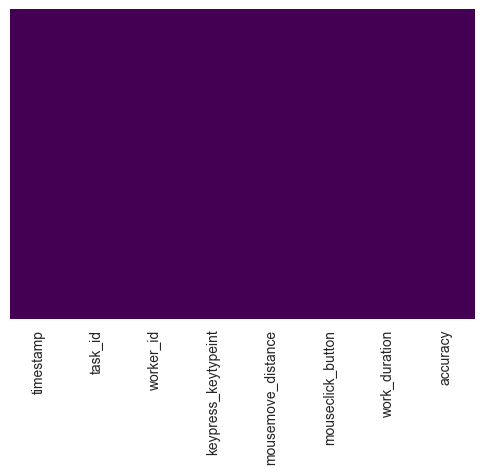

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Calculating mistake column and taking correlation with work_duration does not help. As mistake is more of a PERSONAL CHARACTERSTICK rather than time. So let us calculate that correlation for each person. 

In [15]:
df_accu_work = df[['task_id','work_duration','accuracy','worker_id']]
df_accu_work = pd.DataFrame(df_accu_work.groupby(['task_id','worker_id']).size())
df_accu_work.reset_index(level=0, inplace= True)
df_accu_work.head()

,task_id,0
worker_id,,
503b89aacb02245d320001a4,57a280bc296d6d75f3d34350,49
503b89aacb02245d320001a4,57a280bc296d6d75f3d34351,65
512dbf09c32206698e000518,57a28146e2013f2463dcd0b8,56
512dbf09c32206698e000518,57a28146e2013f2463dcd0ba,43
512dbf09c32206698e000518,57a28146e2013f2463dcd0bb,43


In [16]:
df_accu_work.reset_index(level=0, inplace= True)
df_accu_work.head()

,worker_id,task_id,0
0,503b89aacb02245d320001a4,57a280bc296d6d75f3d34350,49
1,503b89aacb02245d320001a4,57a280bc296d6d75f3d34351,65
2,512dbf09c32206698e000518,57a28146e2013f2463dcd0b8,56
3,512dbf09c32206698e000518,57a28146e2013f2463dcd0ba,43
4,512dbf09c32206698e000518,57a28146e2013f2463dcd0bb,43


In [17]:
df_accu_work.sort(0, axis = 0, ascending = False, inplace = True)

C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [18]:
df_accu_work.head()

,worker_id,task_id,0
124,52833d27863a9990e702e220,57a28712e2013f13df5da190,1669
2999,518ca54f863a9902a40010db,57a3794e296d6d344cc9a65a,221
831,50ca9696cb0224456b0012ba,57a2a1ef296d6d687946f1f5,210
1305,5208c83db684b001ec000c79,57a2b383296d6d019c46e7fd,200
345,503b89aacb02245d320001a4,57a28f16e2013f2213dcce7b,191


In [19]:
df['mousemove_distance']=df['mousemove_distance']/(df['mousemove_distance'].max())

In [20]:
df['work_duration']=df['work_duration']/(df['work_duration'].max())

In [21]:
df['mousemove_distance'].unique()

array([ 0.        ,  0.37945579,  0.05683347, ...,  0.18796088,
        0.19377844,  0.43588316])

In [22]:
df['accuracy'].unique()

array([ 1.        ,  0.5       ,  0.        ,  0.83333333,  0.66666667,
        0.33333333,  0.16666667])

In [23]:
x = np.c_[df['mousemove_distance'].as_matrix(),df['work_duration'].as_matrix()]

col_list=['keypress_keytypeint','mouseclick_button']

for col in col_list:
    x_pre_encode = df[col].as_matrix()
    le = preprocessing.LabelEncoder()
    le.fit(x_pre_encode.reshape(x_pre_encode.shape[0],1))
    ans = le.transform(x_pre_encode)
    
    enc = OneHotEncoder()
    enc.fit(ans.reshape(x_pre_encode.shape[0],1))
    ans1 = enc.transform(ans.reshape(x_pre_encode.shape[0],1)).toarray()
    
    x = np.c_[x,ans1]
    

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
x.shape

(239464, 17)

In [25]:
y = df['accuracy'].reshape(df['accuracy'].shape[0],1)
y.shape

(239464, 1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
coef = pd.DataFrame(lm.coef_ , columns = x_test.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [32]:
predictions = lm.predict(x_test)

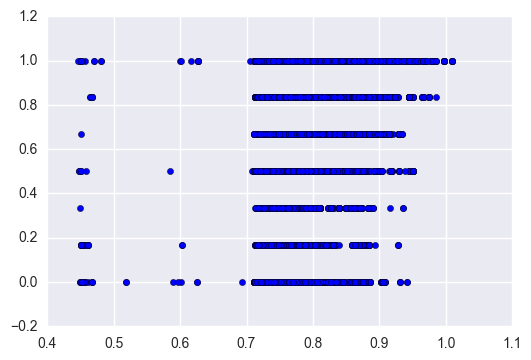

In [33]:
plt.scatter(predictions, y_test)

C:\Users\Chinmay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


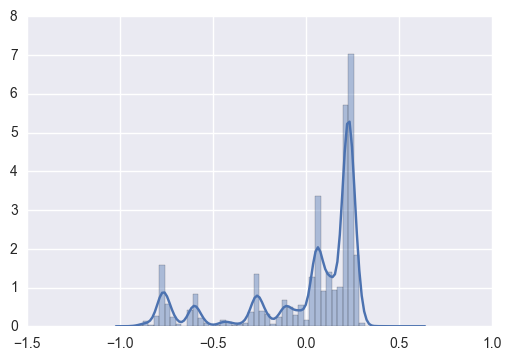

In [34]:
sns.distplot((y_test-predictions))

In [ ]:
X = pd.DataFrame(x)
X

In [ ]:
df.columns

In [ ]:
df['task_id'].unique()

In [ ]:
df.info()

In [ ]:
df[df['task_id']=='57a28146e2013f2463dcd0ba']